In [2]:
from google.colab import files
uploaded = files.upload()


Saving images.jpeg to images.jpeg


In [5]:
image_path = "C:\\Users\\Bindushree\\OneDrive\\Pictures\\images.jpeg"  # No folder path needed after upload


Saved visualization as: output_visual.png


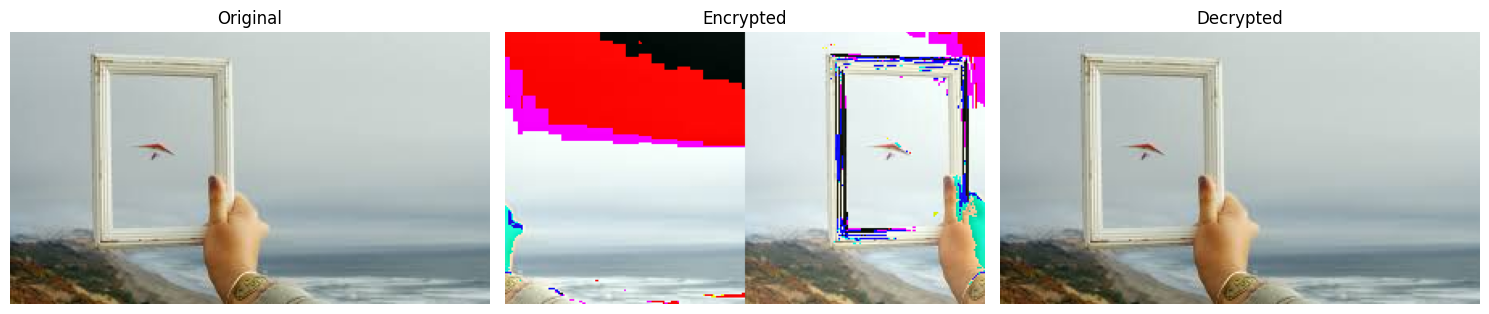

In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

def encrypt_image(image_path, key):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError("Image not found or unable to load")
    img_float = img.astype(np.float32)
    h, w, c = img.shape
    half = w // 2
    img_float[:, :half, :], img_float[:, half:, :] = img_float[:, half:, :].copy(), img_float[:, :half, :].copy()
    encrypted = (img_float + key) % 256
    return encrypted.astype(np.uint8)

def decrypt_image(encrypted, key):
    img_float = (encrypted.astype(np.float32) - key) % 256
    h, w, c = encrypted.shape
    half = w // 2
    img_float[:, :half, :], img_float[:, half:, :] = img_float[:, half:, :].copy(), img_float[:, :half, :].copy()
    return img_float.astype(np.uint8)

# Example usage
image_path = "images.jpeg"  # Replace with your image path
key = 50

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at {image_path}")

# Process images
original_img = cv2.imread(image_path)
encrypted_img = encrypt_image(image_path, key)
decrypted_img = decrypt_image(encrypted_img, key)

# Display results side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(encrypted_img, cv2.COLOR_BGR2RGB))
plt.title("Encrypted")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(decrypted_img, cv2.COLOR_BGR2RGB))
plt.title("Decrypted")
plt.axis('off')

plt.tight_layout()

# Save the combined image
output_path = "output_visual.png"
plt.savefig(output_path, bbox_inches='tight', pad_inches=0.1)
print(f"Saved visualization as: {output_path}")

plt.show()  # Display the plot